<a href="https://colab.research.google.com/github/Rajshekhar-Reddy1/Insaid-July-cohart/blob/main/1007_GCD_Captone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

<center><h2>"Group 1007" :Employee Attrition Predictor</h2></center><br>
 </h3></center>             
<img src="https://projects.insaid.co/capstone2/hr.png" align='left' width="700" height="100"><br/>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
**4.** [**Data Acquisition & Description**](#Section4)<br>
**5.** [**Data Pre-processing & Cleaning**](#Section5)<br>
  - **5.1** [**Handling of Categorical Data**](#Section51)
  - **5.2** [**Handling of Continous Data**](#Section52)
**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Feature Engineering**](#Section7)<br>
  - **7.1** [**Selected Feature Engineered Data**](#Section71) 
**8.** [**Model Building**](#Section8)<br>
**9.** [**Model Evaluation & Model Tuning**](#Section9)<br>
**10.** [**Finalize the model**](#Section10)<br>
**11.** [**Predict the Unseen Future**](#Section11)<br>

---
<a name = Section1></a>
# **1. Introduction**

- Your client for this project is the HR Department at a software company.

- They want to try a new initiative to retain employees.
- The idea is to use data to predict whether an employee is likely to leave.
- Once these employees are identified, HR can be more proactive in reaching out to them before it's too late.
- They only want to deal with the data that is related to permanent employees.
#### Current Practice
Once an employee leaves, he or she is taken an interview with the name “exit interview” and shares reasons for leaving. The HR Department then tries and learns insights from the interview and makes changes accordingly.

- This suffers from the following problems:

- This approach is that it's too haphazard. The quality of insight gained from an interview depends heavily on the skill of the interviewer.
- The second problem is these insights can't be aggregated and interlaced across all employees who have left.
- The third is that it is too late by the time the proposed policy changes take effect.

The **HR department** has hired you as data science consultants. They want to supplement their exit interviews with a more proactive approach.

---

<a name = Section2></a>
# **2. Problem Statement**

**Employee Attrition Prediction**.

HR Department wants solution for determining early prediction of employees that are at risk of leaving organization.

Based on the early prediction,HR department can check proactively if employee can be retained after working out on the concerns of employees before employee resigns. 


---
<a name = Section3></a>
# **3. Installing & Importing Libraries**

In [ ]:
!pip install ipython-sql
!pip install mysqlclient
# In the python cmd, install packages:
!pip3 install pymysql

In [ ]:
#Import Lib
import pandas as pd
import warnings
from pandas_profiling import ProfileReport  
warnings.filterwarnings('ignore')
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,PowerTransformer

import os
from scipy import stats
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='darkgrid',color_codes=True)
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix
import pydotplus
from IPython.display import Image
from sklearn.model_selection import GridSearchCV   

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [ ]:
import pymysql
import pandas as pd

In [ ]:
import xgboost as xgb
xgb.set_config(verbosity=0)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score,SCORERS

---
<a name = Section4></a>
# 4. Data Acquisition & Description


### Description of the Dataset

The Business Intelligence Analysts of the Company provided you three datasets that contain information about past employees and their status (still employed or already left).

1. # department_data
This dataset contains information about each department. The schema of the dataset is as follows:

- dept_id – Unique Department Code 
- dept_name – Name of the Department 
- dept_head – Name of the Head of the Department

2. # employee_details_data
This dataset consists of Employee ID, their Age, Gender and Marital Status. The schema of this dataset is as follows:

- employee_id – Unique ID Number for each employee
- age – Age of the employee
- gender – Gender of the employee
- marital_status – Marital Status of the employee

3. # employee_data
This dataset consists of each employee’s Administrative Information, Workload Information, Mutual Evaluation Information and Status.

Target variable

- status – Current employment status (Employed / Left)
- Administrative information

- department – Department to which the employees belong(ed) to
- salary – Salary level with respect to rest of their department
- tenure – Number of years at the company
- recently_promoted – Was the employee promoted in the last 3 years?
- employee_id – Unique ID Number for each employee

Workload information

- n_projects – Number of projects employee has worked on
- avg_monthly_hrs – Average number of hours worked per month
- Mutual evaluation information

- satisfaction – Score for employee’s satisfaction with the - company (higher is better)
- last_evaluation – Score for most recent evaluation of employee (higher is better)
- filed_complaint – Has the employee filed a formal complaint in the last 3 years?

In [ ]:
#Establish Connection with Database.
conn=pymysql.connect(host='cpanel.insaid.co',port=int(3306),user='student',passwd='student',db='Capstone2')


In [ ]:
#Read Department Data
df_department_data = pd.read_sql_query("select * from department_data ",conn)
df_department_data.head()

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray


In [ ]:
#Read Employee details Data
df_emp_details = pd.read_sql_query("select * from employee_details_data ",conn)
df_emp_details.head()

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [ ]:
#Read Employee Status Data
df_emp_status = pd.read_sql_query("select * from employee_data ",conn)
df_emp_status.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707


In [ ]:
df_emp_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


In [ ]:
df_emp_status.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure,employee_id
count,14150.000000,2046.0,12663.000000,14150.000000,297.0,14000.000000,14000.000000,14150.000000
mean,199.994346,1.0,0.718399,3.778304,1.0,0.621212,3.499357,112080.750247
std,50.833697,0.0,0.173108,1.250162,0.0,0.250482,1.462584,8748.202856
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000,0.000000
25%,155.000000,1.0,0.563711,3.000000,1.0,0.450356,3.000000,105772.500000
50%,199.000000,1.0,0.724731,4.000000,1.0,0.652394,3.000000,111291.500000
75%,245.000000,1.0,0.871409,5.000000,1.0,0.824925,4.000000,116650.750000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000,148988.000000


In [ ]:
df_emp_status.skew()

avg_monthly_hrs      0.017220
filed_complaint      0.000000
last_evaluation     -0.065817
n_projects           0.315634
recently_promoted    0.000000
satisfaction        -0.474783
tenure               1.858239
employee_id          0.462453
dtype: float64

In [ ]:
df_emp_details.skew()

employee_id    1.303497
age            0.701964
dtype: float64

In [ ]:
df_emp_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB


---
<a name = Section5></a>
# 5. Data Pre-processing & Cleaning


In [ ]:
#Lets Apply pre profiling

#Pre Profiling
profile = ProfileReport(df=df_department_data)
profile.to_file(output_file='Pre Profiling Report df_department_data.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


In [ ]:
#Lets Apply pre profiling

#Profiling
profile = ProfileReport(df=df_emp_details)
profile.to_file(output_file='Pre Profiling Report df_emp_details.html')
print('Accomplished!')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


In [ ]:
#Profiling
profile = ProfileReport(df=df_emp_status)
profile.to_file(output_file='Pre Profiling Report df_emp_status.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


**Observations from Pre Processing:**<br>
**Missing Values:**<br>
Department has 707 missing value"		<br>
Filed_Complaint has 12104 missing data"		<br>
Last Evaluation has 1487 missing data"		<br>
Recently Promoted has 13853 missing data"		<br>
Satisfaction has 150 missing data		<br>
Tenure has 150 missing data	<br><br>

 **Other Observations**	<br>
Department Data (DD) set has no relation with other two data sets as Department ID is already existing in employee dataset		<br>
3 data frames are avilable , department data can be ignored as Department ID already exists in employee status<br>
Some Employee ID in  Employee Data is mentioned as 0.<br>
NAN Values exists	<br>
	
		
**Continous Features**<br>
Age<br>
avg_monthly_hrs<br>
last_evaluation<br>
n_projects<br>
satisfaction<br>
tenure<br>
Some of the continous data is slightly skewed and is not normally distributed"		<br>
		
		
**Categorical Data:**<br>
gender :2 categories<br>
marital_status :2 categories<br>
department :11 categories : Same category has different names.<br>
filed_complaint:2 categories<br>
recently_promoted:2 categories<br>
Salary:3 categories		<br>
Some of the Categorical Data has Dtype as Float		<br>

In [ ]:
df_emp_status.isnull().sum()

avg_monthly_hrs         0
department            707
filed_complaint         0
last_evaluation      1487
n_projects              0
recently_promoted       0
salary                  0
satisfaction          150
status                  0
tenure                150
employee_id             0
dtype: int64

---
<a name = Section51></a>
# 5.1. Handling of Categorical Data


In [ ]:
df_emp_status['filed_complaint'].fillna(value=0.0, inplace=True)
df_emp_status['recently_promoted'].fillna(value=0.0, inplace=True)
df_emp_status['filed_complaint'] = df_emp_status['filed_complaint'].astype(str)
df_emp_status['recently_promoted'] = df_emp_status['recently_promoted'].astype(str)
#Deparment
print(df_emp_status['department'].unique())
#Replace
df_emp_status.loc[df_emp_status["department"] == "-IT", "department"] = 'D00-IT'
# Treat missing values for Cat data
df_emp_status['department'] = df_emp_status['department'].fillna(value=df_emp_status['department'].mode()[0])

[None 'D00-SS' 'D00-SP' 'D00-MT' 'D00-PD' 'D00-IT' 'D00-AD' 'D00-MN'
 'D00-ENG' 'D00-PR' 'D00-TP' 'D00-FN' '-IT']


In [ ]:
#Target Variable
df_emp_status.loc[df_emp_status["status"] == "Employed", "status"] = 0
df_emp_status.loc[df_emp_status["status"] == "Left", "status"] = 1

---
<a name = Section52></a>
# 5.2. Handling of Continous Data


In [ ]:
# Employee ID
df_emp_status[df_emp_status['employee_id']==0]['employee_id'].count()
df_emp_status[df_emp_status['employee_id']>0].min()


avg_monthly_hrs          49.0
department             D00-AD
filed_complaint           0.0
last_evaluation      0.316175
n_projects                  1
recently_promoted         0.0
salary                   high
satisfaction         0.040058
status                      0
tenure                    2.0
employee_id            100101
dtype: object

In [ ]:
#Assign some Employee Ids having 0 values with random values
df_emp_status.loc[df_emp_status['employee_id'] == 0,'employee_id'] = df_emp_status['employee_id'].apply(lambda x: abs(np.random.normal(0,100100)))
# Treat missing value for contns data
df_emp_status['last_evaluation'].fillna(value=df_emp_status['last_evaluation'].median(), inplace=True)
df_emp_status['satisfaction'].fillna(value=df_emp_status['satisfaction'].median(), inplace=True)
df_emp_status['tenure'].fillna(value=df_emp_status['tenure'].median(), inplace=True)

In [ ]:
df_emp_details[df_emp_details['employee_id']==0]

,employee_id,age,gender,marital_status


In [ ]:
df_emp_status.isnull().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
employee_id          0
dtype: int64

---
<a name = Section6></a>
# 6. Exploratory Data Analysis


In [ ]:
# join the datasets
df_emp_data = pd.merge(df_emp_status,df_emp_details,on='employee_id')
df_emp_data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status
0,246.0,D00-SS,0.0,0.866838,6,0.0,medium,0.134415,1,4.0,124467.0,42,Female,Married
1,134.0,D00-SS,0.0,0.555718,2,0.0,low,0.511041,1,3.0,112210.0,23,Female,Unmarried
2,156.0,D00-SS,1.0,0.474082,2,0.0,medium,0.405101,1,3.0,126150.0,24,Female,Unmarried
3,256.0,D00-SP,0.0,0.961360,6,0.0,low,0.152974,1,4.0,125346.0,51,Female,Married
4,146.0,D00-SS,0.0,0.507349,2,0.0,medium,0.434845,1,3.0,113707.0,23,Female,Unmarried


In [ ]:
#Profiling
profile = ProfileReport(df=df_emp_data)
profile.to_file(output_file='Post Profiling Report df_emp_data.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


In [ ]:
import sweetviz as sv
sweet_report = sv.analyze(df_emp_data)
sweet_report.show_html('Post Profile sweet_report_df_emp_data.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Post Profile sweet_report_df_emp_data.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
df_emp_data.shape

(14116, 14)

In [ ]:
df_emp_data.drop_duplicates(inplace = True)
df_emp_data.shape

(14116, 14)

In [ ]:
df_emp_data.isna().sum()

avg_monthly_hrs      0
department           0
filed_complaint      0
last_evaluation      0
n_projects           0
recently_promoted    0
salary               0
satisfaction         0
status               0
tenure               0
employee_id          0
age                  0
gender               0
marital_status       0
dtype: int64

### **Exploratory Data Analysis:**<br>
##### Top 3 Departments with Highest Attrition: Sales,Engineering,Support**<br>
##### Salary Distribution is not normal: High number of employees in Low and Medium Bracket**<br>
### EDA : Emloyees who left the Company
  -  Mid Level Performers ussually donot tend to leave.
  -  Lower Experience tend to leave 
  -  People spending lower hrs tend to leave.
  -  Employee Satisfaction is Low
  - for Corelation between different features refer report.


---
<a name = Section7></a>
# 7. Feature Engineering


In [ ]:
df_emp_data.set_index('employee_id')

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,age,gender,marital_status
employee_id,,,,,,,,,,,,,
124467.0,246.0,D00-SS,0.0,0.866838,6,0.0,medium,0.134415,1,4.0,42,Female,Married
112210.0,134.0,D00-SS,0.0,0.555718,2,0.0,low,0.511041,1,3.0,23,Female,Unmarried
126150.0,156.0,D00-SS,1.0,0.474082,2,0.0,medium,0.405101,1,3.0,24,Female,Unmarried
125346.0,256.0,D00-SP,0.0,0.961360,6,0.0,low,0.152974,1,4.0,51,Female,Married
113707.0,146.0,D00-SS,0.0,0.507349,2,0.0,medium,0.434845,1,3.0,23,Female,Unmarried
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100833.0,141.0,D00-SS,0.0,0.537866,3,0.0,low,0.610841,0,3.0,29,Male,Unmarried
118090.0,168.0,D00-SS,0.0,0.643553,3,0.0,low,0.489559,0,3.0,24,Female,Unmarried
106064.0,257.0,D00-SP,0.0,0.724731,3,0.0,medium,0.944942,0,3.0,27,Male,Unmarried


In [ ]:
#Supervised Learning : Spearate Explainatory variables and Target Variables

# independent variables
x_data = df_emp_data.drop(['status'],axis=1)
# dependent variables
y_data = df_emp_data['status']
y_data = y_data.astype('float64')

**Feature Transformation:**<br>
- Divide the Features in Categorical and Continous Data<br>
- Apply different Transformations : Categorical Data<br>
- Apply different Transformations : Continous Data<br>
- Combine tranformed Data<br>
- Finalize the best transformation Technique<br><br>

**Divide the Features in Categorical and Continous Data:**<br>

In [ ]:
#Divide cat and contns data and apply transformation
# Getting categorical features
x_data_cat = x_data.select_dtypes(include='object')
print(f"Categorical feature shape is {x_data_cat.shape}")

Categorical feature shape is (14116, 6)


In [ ]:
#Contns Data
x_data_contns = x_data.select_dtypes(include=['int64','float64'])
print(f"Contimous feature shape is {x_data_contns.shape}")

Contimous feature shape is (14116, 7)


**Apply different Transformations : Categorical Data:**<br>
- One Hot Encoding<br>

In [ ]:
# importing train_test_split for cat
from sklearn.model_selection import train_test_split
xtrain_cat,xtest_cat,ytrain,ytest= train_test_split(x_data_cat,y_data,test_size=0.20,random_state=20)

In [ ]:
# One Hot Encoding for Categorical Data
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
Fit = enc.fit(xtrain_cat)
OneHotEncoder(handle_unknown='ignore')
xtrain_cat_enc = Fit.transform(xtrain_cat).toarray()
xtest_cat_enc = Fit.transform(xtest_cat).toarray()

In [ ]:
xtest_cat.shape

(2824, 6)

In [ ]:
print(xtest_cat_enc.shape)
xtrain_cat_enc.shape

(2824, 22)


(11292, 22)

In [ ]:
print(xtrain_cat_enc.shape)
print(xtrain_cat_enc.dtype)
df_Xcat = pd.DataFrame(xtrain_cat_enc)
df_Xcat.head()

(11292, 22)
float64


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


**Apply different Transformations : Continous Data:**<br>
- Power Transform<br>

In [ ]:
#Power Transform for cont Data
# importing train_test_split for cat
from sklearn.model_selection import train_test_split
xtrain_contns,xtest_contns,ytrain,ytest= train_test_split(x_data_contns,y_data,test_size=0.20,random_state=20)
pt = PowerTransformer()
Fit = pt.fit(xtrain_contns)
PowerTransformer(copy=True, method='yeo-johnson', standardize=True)
xtrain_contns_pwr = Fit.transform(xtrain_contns)
xtest_contns_pwr= Fit.transform(xtest_contns)
print(xtrain_contns_pwr.shape)
print(xtest_contns_pwr.shape)

(11292, 7)
(2824, 7)


In [ ]:
print(xtrain_contns_pwr.shape)
print(xtrain_contns_pwr.dtype)
df_Xcontns = pd.DataFrame(xtrain_contns_pwr)
df_Xcontns.head()

(11292, 7)
float64


,0,1,2,3,4,5,6
0,1.349971,1.627903,-0.566715,-0.094217,-0.140902,1.110223e-15,-0.441421
1,-0.974441,-1.366530,-1.533110,-1.172473,-0.140902,4.440892e-16,0.916658
2,-1.435066,-0.113721,0.257851,0.217825,1.208062,-2.275957e-15,0.983335
3,1.257913,0.732486,0.984564,0.213044,-0.140902,1.054712e-15,0.220453
4,-1.329103,-1.131189,-1.533110,-1.011817,-0.140902,3.608225e-15,-0.980361


**Apply different Transformations : Continous Data:**<br>
- Standard Scaler<br>

In [ ]:
from sklearn.preprocessing import StandardScaler
stand= StandardScaler()
Fit = stand.fit(xtrain_contns)
xtrain_contns_std = Fit.transform(xtrain_contns)
xtest_contns_std = Fit.transform(xtest_contns)
print(xtrain_contns_std.shape)
print(xtest_contns_std.shape)

(11292, 7)
(2824, 7)


**Combine Transformed Data:**<br>
- Power Transform + One hot encoding<br>

In [ ]:
#Concatenate the transformed conts and cat variables : Power Transform + One hot encoding
Xtrain_pwr = np.concatenate([xtrain_contns_pwr,xtrain_cat_enc],axis=1)
print(Xtrain_pwr.shape)

Xtest_pwr = np.concatenate([xtest_contns_pwr,xtest_cat_enc],axis=1)
print(Xtest_pwr.shape)

(11292, 29)
(2824, 29)


**Combine Transformed Data:**<br>
- Std Scaler + One hot encoding<br>

In [ ]:
#Concatenate the transformed conts and cat variables : Std Scaling + One hot encoding
Xtrain_std = np.concatenate([xtrain_contns_std,xtrain_cat_enc],axis=1)
print(Xtrain_std.shape)

Xtest_std = np.concatenate([xtest_contns_std,xtest_cat_enc],axis=1)
print(Xtest_std.shape)

(11292, 29)
(2824, 29)


**Apply PCA on Combine Transformed Data:**<br>
- Std Scaler + One hot encoding + PCA <br>
- Power Transform + One hot encoding + PCA <br>

In [ ]:
from sklearn.decomposition import PCA
pca= PCA(n_components=29)

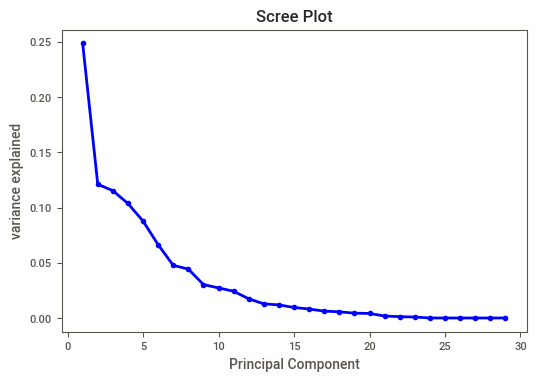

In [ ]:
# PCA STD
pca.fit(Xtrain_std)
Xtrain_std_pca = pca.fit_transform(Xtrain_std)
Xtest_std_pca = pca.fit_transform(Xtest_std)

pc_values = np.arange(pca.n_components_)+1
plt.plot(pc_values,pca.explained_variance_ratio_,'o-',linewidth=2,color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('variance explained')
plt.show()

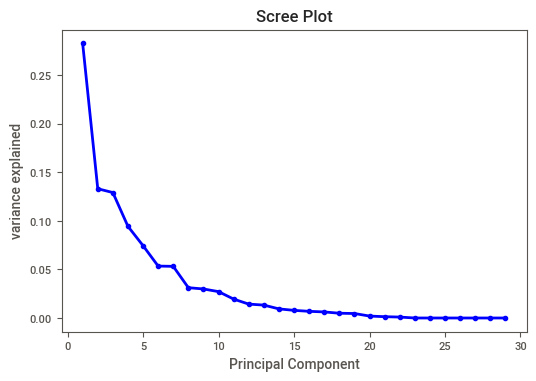

In [ ]:
# PCA PWR
pca.fit(Xtrain_pwr)
Xtrain_pwr_pca = pca.fit_transform(Xtrain_pwr)
Xtest_pwr_pca = pca.fit_transform(Xtest_pwr)

pc_values = np.arange(pca.n_components_)+1
plt.plot(pc_values,pca.explained_variance_ratio_,'o-',linewidth=2,color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('variance explained')
plt.show()

**Apply WOE Tranformation on original Data:**<br>

In [ ]:
from xverse.transformer import WOE
Xtrain_woe, Xtest_woe, ytrain, ytest = train_test_split(x_data, y_data, test_size= .20,random_state=20)
clf_woe = WOE()
clf_woe.fit(x_data, y_data)
x_data_woe = clf_woe.transform(x_data)

In [ ]:
x_data_woe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14144
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14116 non-null  float64
 1   department         14116 non-null  float64
 2   filed_complaint    14116 non-null  float64
 3   last_evaluation    14116 non-null  float64
 4   n_projects         14116 non-null  float64
 5   recently_promoted  14116 non-null  float64
 6   salary             14116 non-null  float64
 7   satisfaction       14116 non-null  float64
 8   tenure             14116 non-null  float64
 9   employee_id        14116 non-null  float64
 10  age                14116 non-null  float64
 11  gender             14116 non-null  float64
 12  marital_status     14116 non-null  float64
dtypes: float64(13)
memory usage: 2.0 MB


In [ ]:
#WOE Transformation on data and LR results
Xtrain, Xtest, ytrain, ytest = train_test_split(x_data_woe, y_data, test_size= .20,random_state=20)


**Evaluate Different Feature Transformations using simple Classifier Model results:**<br>
- Logistic Regression<br>

In [ ]:
#WOE
lr = LogisticRegression()
lr.fit(Xtrain,ytrain)

print("WOE Training Accuracy")
print(lr.score(Xtrain,ytrain))
print("WOE Testing Accuracy")
print(lr.score(Xtest,ytest))

y_train_pred_count = lr.predict(Xtrain)
y_test_pred_count = lr.predict(Xtest)
#print(confusion_matrix(ytest,predicted))

train_report = classification_report(ytrain, y_train_pred_count)
test_report = classification_report(ytest, y_test_pred_count)
print('                   WOE  Training Report          ')
print(train_report)
print('                   WOE Testing Report           ')
print(test_report)

print('                   WOE Testing Confusion Matrix            ')
print(confusion_matrix(ytest,y_test_pred_count))

scoresdt = cross_val_score(lr,Xtrain,ytrain,cv=10,scoring='f1')
print("WOE scoresdt")
print(scoresdt)
print("WOE Average f1")
print(np.mean(scoresdt))



WOE Training Accuracy
0.8665426850867871
WOE Testing Accuracy
0.8640226628895185
                   WOE  Training Report          
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      8621
         1.0       0.74      0.67      0.70      2671

    accuracy                           0.87     11292
   macro avg       0.82      0.80      0.81     11292
weighted avg       0.86      0.87      0.86     11292

                   WOE Testing Report           
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      2140
         1.0       0.75      0.66      0.70       684

    accuracy                           0.86      2824
   macro avg       0.82      0.79      0.81      2824
weighted avg       0.86      0.86      0.86      2824

                   WOE Testing Confusion Matrix            
[[1991  149]
 [ 235  449]]
WOE scoresdt
[0.68711656 0.69047619 0.71264368 0.71372549 0.71317829 0.67594433

In [ ]:
#LR Results on Power transformed and One hot encoded
lr = LogisticRegression()
lr.fit(Xtrain_pwr,ytrain)

print("PWR+OneHot Training Accuracy")
print(lr.score(Xtrain_pwr,ytrain))
print("PWR+OneHot Testing Accuracy")
print(lr.score(Xtest_pwr,ytest))
y_train_pred_count = lr.predict(Xtrain_pwr)
y_test_pred_count = lr.predict(Xtest_pwr)
#print(confusion_matrix(ytest,predicted))

train_report = classification_report(ytrain, y_train_pred_count)
test_report = classification_report(ytest, y_test_pred_count)
print('                    PWR+OneHot Training Report          ')
print(train_report)
print('                    PWR+OneHot Testing Report           ')
print(test_report)

print('                    PWR+OneHot Testing Confusion Matrix            ')
print(confusion_matrix(ytest,y_test_pred_count))


scoresdt = cross_val_score(lr,Xtrain_pwr,ytrain,cv=10,scoring='f1')
print("PWR+OneHot scoresdt")
print(scoresdt)
print("PWR+OneHot Average f1")
print(np.mean(scoresdt))

PWR+OneHot Training Accuracy
0.8016294721927028
PWR+OneHot Testing Accuracy
0.7921388101983002
                    PWR+OneHot Training Report          
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      8621
         1.0       0.62      0.43      0.51      2671

    accuracy                           0.80     11292
   macro avg       0.73      0.67      0.69     11292
weighted avg       0.79      0.80      0.79     11292

                    PWR+OneHot Testing Report           
              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      2140
         1.0       0.60      0.42      0.50       684

    accuracy                           0.79      2824
   macro avg       0.72      0.67      0.68      2824
weighted avg       0.78      0.79      0.78      2824

                    PWR+OneHot Testing Confusion Matrix            
[[1949  191]
 [ 396  288]]
PWR+OneHot scoresdt
[0.51569507 0.51388889

In [ ]:
# Use scaling for contns Data in stead of pwr transforming
#LR Results on tandard Scaler and One hot encoded
lr = LogisticRegression()
lr.fit(Xtrain_std,ytrain)

print("STD+OneHot Training Accuracy")
print(lr.score(Xtrain_std,ytrain))
print("STD+OneHot Testing Accuracy")
print(lr.score(Xtest_std,ytest))
y_train_pred_count = lr.predict(Xtrain_std)
y_test_pred_count = lr.predict(Xtest_std)
#print(confusion_matrix(ytest,predicted))

train_report = classification_report(ytrain, y_train_pred_count)
test_report = classification_report(ytest, y_test_pred_count)
print('                    STD+OneHot Training Report          ')
print(train_report)
print('                    STD+OneHot Testing Report           ')
print(test_report)

print('                    STD+OneHot Testing Confusion Matrix            ')
print(confusion_matrix(ytest,y_test_pred_count))


scoresdt = cross_val_score(lr,Xtrain_std,ytrain,cv=10,scoring='f1')
print("STD+OneHot scoresdt")
print(scoresdt)
print("STD+OneHot Average f1")
print(np.mean(scoresdt))


STD+OneHot Training Accuracy
0.8188097768331563
STD+OneHot Testing Accuracy
0.8087818696883853
                    STD+OneHot Training Report          
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89      8621
         1.0       0.68      0.45      0.54      2671

    accuracy                           0.82     11292
   macro avg       0.76      0.69      0.71     11292
weighted avg       0.81      0.82      0.80     11292

                    STD+OneHot Testing Report           
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      2140
         1.0       0.65      0.45      0.53       684

    accuracy                           0.81      2824
   macro avg       0.75      0.69      0.71      2824
weighted avg       0.79      0.81      0.80      2824

                    STD+OneHot Testing Confusion Matrix            
[[1979  161]
 [ 379  305]]
STD+OneHot scoresdt
[0.55092593 0.54587156

In [ ]:

#WOE PCA:
pca= PCA(n_components=10)
pca.fit(Xtrain)
Xtrain_woe_pca = pca.fit_transform(Xtrain)
Xtest_woe_pca = pca.fit_transform(Xtest)

#STD PCA:
pca= PCA(n_components=20)
pca.fit(Xtrain_std)
Xtrain_std_pca = pca.fit_transform(Xtrain_std)
Xtest_std_pca = pca.fit_transform(Xtest_std)

#PWR PCA:
pca= PCA(n_components=20)
pca.fit(Xtrain_pwr)
Xtrain_pwr_pca = pca.fit_transform(Xtrain_pwr)
Xtest_pwr_pca = pca.fit_transform(Xtest_pwr)

In [ ]:
# PCA Std Scaler Onehot Encoding
lr = LogisticRegression()
lr.fit(Xtrain_std_pca,ytrain)

print("PCA+STD+OneHot Training Accuracy")
print(lr.score(Xtrain_std_pca,ytrain))
print("PCA+STD+OneHot Testing Accuracy")
print(lr.score(Xtest_std_pca,ytest))
y_train_pred_count = lr.predict(Xtrain_std_pca)
y_test_pred_count = lr.predict(Xtest_std_pca)
#print(confusion_matrix(ytest,predicted))

train_report = classification_report(ytrain, y_train_pred_count)
test_report = classification_report(ytest, y_test_pred_count)
print('                    PCA+STD+OneHot Training Report          ')
print(train_report)
print('                    PCA+STD+OneHot Testing Report           ')
print(test_report)

print('                    PCA+STD+OneHot Testing Confusion Matrix            ')
print(confusion_matrix(ytest,y_test_pred_count))


scoresdt = cross_val_score(lr,Xtrain_std_pca,ytrain,cv=10,scoring='f1')
print("PCA+STD+OneHot scoresdt")
print(scoresdt)
print("PCA+STD+OneHot Average f1")
print(np.mean(scoresdt))


PCA+STD+OneHot Training Accuracy
0.8180127523910733
PCA+STD+OneHot Testing Accuracy
0.78328611898017
                    PCA+STD+OneHot Training Report          
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.89      8621
         1.0       0.67      0.45      0.54      2671

    accuracy                           0.82     11292
   macro avg       0.76      0.69      0.71     11292
weighted avg       0.80      0.82      0.80     11292

                    PCA+STD+OneHot Testing Report           
              precision    recall  f1-score   support

         0.0       0.81      0.93      0.87      2140
         1.0       0.59      0.34      0.43       684

    accuracy                           0.78      2824
   macro avg       0.70      0.63      0.65      2824
weighted avg       0.76      0.78      0.76      2824

                    PCA+STD+OneHot Testing Confusion Matrix            
[[1981  159]
 [ 453  231]]
PCA+STD+OneHot scoresdt


In [ ]:
# PCA : PWR Transform + One Hot Encoding
lr = LogisticRegression()
lr.fit(Xtrain_pwr_pca,ytrain)

print("PCA+PWR+OneHot Training Accuracy")
print(lr.score(Xtrain_pwr_pca,ytrain))
print("PCA+PWR+OneHot Testing Accuracy")
print(lr.score(Xtest_pwr_pca,ytest))
y_train_pred_count = lr.predict(Xtrain_pwr_pca)
y_test_pred_count = lr.predict(Xtest_pwr_pca)
#print(confusion_matrix(ytest,predicted))

train_report = classification_report(ytrain, y_train_pred_count)
test_report = classification_report(ytest, y_test_pred_count)
print('                    PCA+PWR+OneHot Training Report          ')
print(train_report)
print('                    PCA+PWR+OneHot Testing Report           ')
print(test_report)

print('                    PCA+PWR+OneHot Testing Confusion Matrix            ')
print(confusion_matrix(ytest,y_test_pred_count))


scoresdt = cross_val_score(lr,Xtrain_pwr_pca,ytrain,cv=10,scoring='f1')
print("PCA+PWR+OneHot scoresdt")
print(scoresdt)
print("PCA+PWR+OneHot Average f1")
print(np.mean(scoresdt))


PCA+PWR+OneHot Training Accuracy
0.8016294721927028
PCA+PWR+OneHot Testing Accuracy
0.7503541076487252
                    PCA+PWR+OneHot Training Report          
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      8621
         1.0       0.62      0.43      0.51      2671

    accuracy                           0.80     11292
   macro avg       0.73      0.67      0.69     11292
weighted avg       0.79      0.80      0.79     11292

                    PCA+PWR+OneHot Testing Report           
              precision    recall  f1-score   support

         0.0       0.80      0.89      0.84      2140
         1.0       0.48      0.32      0.39       684

    accuracy                           0.75      2824
   macro avg       0.64      0.61      0.61      2824
weighted avg       0.72      0.75      0.73      2824

                    PCA+PWR+OneHot Testing Confusion Matrix            
[[1898  242]
 [ 463  221]]
PCA+PWR+OneHot scoresd

In [ ]:
# PCA WOE
lr = LogisticRegression()
lr.fit(Xtrain_woe_pca,ytrain)

print("PCA+WOE Training Accuracy")
print(lr.score(Xtrain_woe_pca,ytrain))
print("PCA+WOE Testing Accuracy")
print(lr.score(Xtest_woe_pca,ytest))
y_train_pred_count = lr.predict(Xtrain_woe_pca)
y_test_pred_count = lr.predict(Xtest_woe_pca)
#print(confusion_matrix(ytest,predicted))

train_report = classification_report(ytrain, y_train_pred_count)
test_report = classification_report(ytest, y_test_pred_count)
print('                    PCA+WOE Training Report          ')
print(train_report)
print('                    PCA+WOE Testing Report           ')
print(test_report)

print('                    PCA+WOE Testing Confusion Matrix            ')
print(confusion_matrix(ytest,y_test_pred_count))


scoresdt = cross_val_score(lr,Xtrain_woe_pca,ytrain,cv=10,scoring='f1')
print("PCA+WOE scoresdt")
print(scoresdt)
print("PCA+WOE Average f1")
print(np.mean(scoresdt))


PCA+WOE Training Accuracy
0.8648600779312788
PCA+WOE Testing Accuracy
0.8519830028328612
                    PCA+WOE Training Report          
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      8621
         1.0       0.74      0.66      0.70      2671

    accuracy                           0.86     11292
   macro avg       0.82      0.79      0.81     11292
weighted avg       0.86      0.86      0.86     11292

                    PCA+WOE Testing Report           
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      2140
         1.0       0.73      0.61      0.67       684

    accuracy                           0.85      2824
   macro avg       0.81      0.77      0.79      2824
weighted avg       0.85      0.85      0.85      2824

                    PCA+WOE Testing Confusion Matrix            
[[1990  150]
 [ 268  416]]
PCA+WOE scoresdt
[0.69090909 0.69444444 0.69731801 0.7201

---
<a name = Section71></a>
# 7.1. Selected Feature Engineered Data


### Feature Transformer Selection : Selected Tranformer for feature engineering is Weight of Evidence as per below results

| Index| Transformer | Accuracy score | Precision | Recall | f1-Score | Average f1-Score |
| - | - | - | - | - | - | - |
| 1. | WOE  | 0.86402 | 0.75 | 0.66 | 0.70 | 0.70187 |
| 2. | Power + One Hot Encoding | 0.79213 | 0.60 | 0.42 | 0.50 | 0.50518 |
| 3. | Std Scale + One Hot Encoding | 0.80878 |  0.65  | 0.45  | 0.53 | 0.53834 |
| 4. | PCA : WOE| 0.85198 | 0.73 | 0.61 | 0.67| 0.69771 | 
| 5. | PCA : Std Scale + One Hot Encoding  | 0.78328 | 0.59 | 0.34 | 0.43 | 0.53551 |
| 6. | PCA : Power + One Hot Encoding | 0.75035 | 0.72 | 0.75 | 0.73| 0.50510 |

In [ ]:
#What was done till now
#Read the data 
#Cleaned the Data
#Merged the Dataset 
#Tried different feature engineering and Scaling 
# Std scaling + One hot encoding +PCA
#Power Transformation + One hot encoding + PCS
# WOE Encoding
# Checked basic performance of LR with above options : WOE gave better results 

---
<a name = Section8></a>
# 8. Model Building


### Below Models to be applied and Evaluated : 
### Step 1:
- Logistic Regression
- Random Forest (Ensemble)
- Naive Bayes
- K-Neighbors
- XGBoost (Ensemble)

### Step 2
- Bagging for Best Performing Model 


###### Define Function for Model KPI

In [ ]:
def modelKPI(alg,dtrain,dtest,predictors,target): 
    
    Xtrain1 = dtrain[predictors]
    Xtest1 = dtest[predictors]
    ytrain1 = dtrain[target]
    ytest1 = dtest[target]
    
    y_train_pred_count1 = alg.predict(Xtrain1)
    y_test_pred_count1 = alg.predict(Xtest1)
    
    model_name = type(alg).__name__

    train_report = classification_report(ytrain1, y_train_pred_count1)
    test_report = classification_report(ytest1, y_test_pred_count1)
    print('\n***********New Model**************',":", model_name, ':')
    print("***********************************************************************************")
    #print('Parameters currently in use:\n')
    #print(alg.get_params())
    print("***********************************************************************************")
   
    
    print(model_name,':'," Training Accuracy",alg.score(Xtrain1,ytrain1))
    print(model_name,':'," Testing Accuracy",alg.score(Xtest1,ytest1))
    print(model_name,':',' Training Report          ')
    print(train_report)
    print("***********************************************************************************")
    
    print(model_name,':',' Testing Report           ')
    print(test_report)
    print("***********************************************************************************")

    print(model_name,':',' Testing Confusion Matrix            ')
    print(confusion_matrix(ytest1,y_test_pred_count1))
    print("***********************************************************************************")

    scoresdt1 = cross_val_score(alg,Xtrain1,ytrain1,cv=10,scoring='f1')
    print(model_name,':',"scoresdt F1",':',scoresdt1)
    print(model_name,':',"Average f1",np.mean(scoresdt1))
    print("***********************************************************************************")
    
    scoresdt1 = cross_val_score(alg,Xtrain1,ytrain1,cv=10,scoring='recall_weighted')
    print(model_name,':',"scoresdt_rec",':',scoresdt1)
    print(model_name,':',"Average recall_weighted",np.mean(scoresdt1))
    print("***********************************************************************************")
    
    scoresdt1 = cross_val_score(alg,Xtrain1,ytrain1,cv=10,scoring='precision_weighted')
    print(model_name,':',"scoresdt Precision",':',scoresdt1)
    print(model_name,':',"Average precision_weighted",np.mean(scoresdt1))
    print("***********************************************************************************")

    print("**************Classifiers Done*************")

### Build Below Models : 
- Logistic Regression
- Random Forest
- Naive Bayes
- K-Neighbors
- XGBClassifier

In [ ]:
#Classifiers
# Training And Testing Set Data Frame
trainSet = Xtrain
testSet = Xtest
trainSet['status'] = ytrain
testSet['status'] = ytest
target = 'status'
id = 'employee_id'
predictors = [x for x in trainSet.columns if x not in [target,id] ]

# Instantiating various classifiers
clfs = [KNeighborsClassifier(),
        RandomForestClassifier(random_state=0, class_weight='balanced'),
        GaussianNB(),
        LogisticRegression(random_state=0),
        XGBClassifier(),
        GradientBoostingClassifier()]

for clf in clfs:
  # Extracting model name
  model_name = type(clf).__name__

  # Fit the model on train data
  clf.fit(trainSet[predictors], trainSet[target])\
  
  modelKPI(clf,trainSet,testSet,predictors,target)


***********New Model************** : KNeighborsClassifier :
***********************************************************************************
***********************************************************************************
KNeighborsClassifier :  Training Accuracy 0.9453595465816508
KNeighborsClassifier :  Testing Accuracy 0.9302407932011332
KNeighborsClassifier :  Training Report          
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      8621
         1.0       0.88      0.88      0.88      2671

    accuracy                           0.95     11292
   macro avg       0.92      0.92      0.92     11292
weighted avg       0.95      0.95      0.95     11292

***********************************************************************************
KNeighborsClassifier :  Testing Report           
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      2140
         1.0       0.86      0

---
<a name = Section9></a>
# 9. Model Evaluation & Model Tuning


### First Level Model Evaluation and Selection based on default parameters passed to Models

| Index| Model | Accuracy score | Precision | Recall | f1-score | Avg f1-Score | recall_weighted |  precision_weighted|
| - | - | - | - | - | - | - | - | - |
| 1. | KNeighborsClassifier  | 0.93024 | 0.86 | 0.85 | 0.86 | 0.84972 | 0.92862 | 0.92896 | 
| 2. | Random Forest Classifier | 0.94511 | 0.88  | 0.89  | 0.89  | 0.87590 | 0.94075 | 0.94124 |
| 3. | GaussianNB | 0.7956 | 0.56 |  0.78 |  0.65 | 0.64829 | 0.7950 | 0.8369 |
| 4. | LogisticRegression | 0.86189 | 0.74  | 0.67 | 0.70 | 0.7111 | 0.8691 | 0.8661 |
| 5. | XGBClassifier | 0.9475 | 0.90 | 0.89  | 0.89  | 0.8894 | 0.9475 | 0.9477 |
| 6. | GradientBoostingClassifier| 0.9390 | 0.87 | 0.88 | 0.87 | 0.8690 |0.9370 | 0.9380 |

### Based on the Model KPIs : the selected Model is XGBoost

## Hypertuning the Selected Model : XGBoost
### Parameters to tune:
- Step 1: Fix learning rate and number of estimators for tuning tree-based parameters
- Step 2 : Tune max_depth & min_child_weight
- Step 3 :Tune gama
- Step 4 : subsample & colsample_bytree
- Step 5: Tuning Regularization Parameters

In [ ]:
#Step 1: Fix learning rate and number of estimators for tuning tree-based parameters

In [ ]:
#Function to give the tunes parameter based on common CV and other 
def modelfit(alg, dtrain,dtest, predictors,target,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
        
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    dtest_predictions = alg.predict(dtest[predictors])
    dtest_predprob = alg.predict_proba(dtest[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Training Report ")
    print ("Accuracy : %.4g" % accuracy_score(dtrain[target].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % roc_auc_score(dtrain[target], dtrain_predprob))
    
    print ("\nModel Test Report ")
    print ("Accuracy : %.4g" % accuracy_score(dtest[target].values, dtest_predictions))
    print ("AUC Score (Test): %f" % roc_auc_score(dtest[target], dtest_predprob))
    
    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    
    modelKPI(alg,dtrain,dtest,predictors,target)

In [ ]:
#Choose all predictors except target & IDcols, tru different values and conclude
trainSet = Xtrain
testSet = Xtest
trainSet['status'] = ytrain
testSet['status'] = ytest
target = 'status'
id = 'employee_id'
predictors = [x for x in trainSet.columns if x not in [target,id] ]

xgb1 = XGBClassifier(
 learning_rate =0.15,
 n_estimators=600,
 max_depth=10,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, trainSet,testSet,predictors,target)


Model Training Report 
Accuracy : 0.9656
AUC Score (Train): 0.992131

Model Test Report 
Accuracy : 0.9483
AUC Score (Test): 0.980201
***********************************************************************************
Parameters currently in use:

{'objective': 'binary:logistic', 'use_label_encoder': True, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'enable_categorical': False, 'gamma': 0, 'gpu_id': -1, 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.15, 'max_delta_step': 0, 'max_depth': 10, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 59, 'n_jobs': 4, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 27, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 0.8, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None, 'nthread': 4, 'seed': 27}
***********************************************************************

In [ ]:
#Step 2 : Tune max_depth & min_child_weight
param_test1 = {
 'max_depth':range(2,10,1),
 'min_child_weight':range(1,10,1)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.15, n_estimators=600, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
gsearch1.fit(trainSet[predictors],trainSet[target])


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.15, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=600, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weigh

In [ ]:
print(gsearch1.best_params_)
print(gsearch1.best_score_)

In [ ]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.15, n_estimators=600, max_depth=10,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4, cv=5)
gsearch4.fit(trainSet[predictors],trainSet[target])
gsearch4.best_params_, gsearch4.best_score_

In [ ]:
#Step 5: Tuning Regularization Parameters
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.15, n_estimators=600, max_depth=10,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4, cv=5)
gsearch6.fit(trainSet[predictors],trainSet[target])
gsearch6.best_params_, gsearch6.best_score_

---
<a name = Section10></a>
# 10. Finalize the Model


## Apply the full tuning paramneters : XGBoost
### Finalize the XGBoost Model


Model Training Report 
Accuracy : 0.9528
AUC Score (Train): 0.979364

Model Test Report 
Accuracy : 0.9518
AUC Score (Test): 0.975297

***********New Model************** : XGBClassifier :
***********************************************************************************
***********************************************************************************
XGBClassifier :  Training Accuracy 0.9527984413744244
XGBClassifier :  Testing Accuracy 0.9518413597733711
XGBClassifier :  Training Report          
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      8621
         1.0       0.90      0.90      0.90      2671

    accuracy                           0.95     11292
   macro avg       0.93      0.94      0.93     11292
weighted avg       0.95      0.95      0.95     11292

***********************************************************************************
XGBClassifier :  Testing Report           
              precision    recall  f1-s

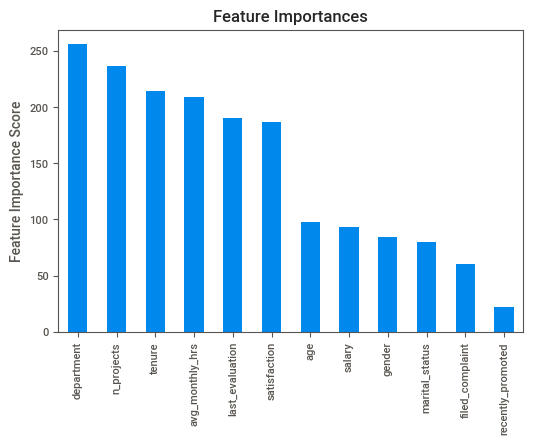

In [ ]:
#Parameters selected with grid CV tuning Tuning:
#learning_rate =0.15
#n_estimators=600
#max_depth=3,
#min_child_weight=1
#gamma=0.9
#reg_alpha = 1

trainSet = Xtrain
testSet = Xtest
trainSet['status'] = ytrain
testSet['status'] = ytest
target = 'status'
id = 'employee_id'
predictors = [x for x in trainSet.columns if x not in [target,id] ]

xgb4 = XGBClassifier(
 learning_rate =0.15,
 n_estimators=600,
 max_depth=3,
 min_child_weight=1,
 gamma=0.9,
 subsample=0.8,
 colsample_bytree=0.6,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
 reg_alpha = 1)
modelfit(xgb4, trainSet,testSet,predictors,target)

---
<a name = Section10></a>
# 10. Predict the Unseen Future


In [ ]:
#Unseen Data Prediction
X_unseen_data = pd.read_csv("GCD_Capstone_Project_unseen_data.csv")

In [ ]:

X_unseen_data['filed_complaint'].fillna(value=0.0, inplace=True)
X_unseen_data['recently_promoted'].fillna(value=0.0, inplace=True)
X_unseen_data['filed_complaint'] = df_emp_status['filed_complaint'].astype(str)
X_unseen_data['recently_promoted'] = df_emp_status['recently_promoted'].astype(str)
#Replace
X_unseen_data.loc[df_emp_status["department"] == "-IT", "department"] = 'D00-IT'
# Treat missing values for Cat data
X_unseen_data['department'] = df_emp_status['department'].fillna(value=df_emp_status['department'].mode()[0])

In [ ]:
X_unseen_data['satisfaction'].fillna(value=df_emp_status['satisfaction'].median(), inplace=True)
X_unseen_data['tenure'].fillna(value=df_emp_status['tenure'].median(), inplace=True)
X_unseen_data['last_evaluation'].fillna(value=df_emp_status['last_evaluation'].median(), inplace=True)

In [ ]:
X_unseen_merged = pd.merge(X_unseen_data,df_emp_details,on='employee_id')
X_unseen_merged_woe = clf_woe.transform(X_unseen_merged)

In [ ]:
target = 'status'
id = 'employee_id'
predictors = [x for x in Unseen_Data.columns if x not in [target,id] ]

dtrain_predprob = xgb4.predict_proba(X_unseen_merged_woe[predictors])[:,1]

In [ ]:
dtrain_predprob

array([9.2869741e-01, 1.8261274e-03, 5.7964343e-01, 3.8272224e-03,
       5.9174150e-02, 3.8862168e-03, 1.2766325e-02, 2.6375072e-02,
       8.6521255e-03, 3.8942881e-03, 1.1670967e-02, 9.7172540e-01,
       4.0041146e-01, 1.1975928e-02, 5.4017813e-03, 3.7595511e-03,
       9.2869741e-01, 6.1499192e-03, 7.6757330e-03, 6.0762554e-02,
       7.3277205e-01, 9.0865248e-01, 7.0917994e-02, 2.7148273e-02,
       6.1354530e-01, 4.0412834e-03, 1.8922463e-01, 9.8619715e-04,
       9.9973148e-01, 7.9182677e-02, 3.9321152e-03, 5.7693995e-03,
       7.2533055e-04, 6.9154147e-03, 4.5825327e-03, 5.2095409e-03,
       2.0357192e-02, 9.5331472e-01, 3.1310904e-03, 1.1727589e-02,
       9.5331472e-01, 5.3844398e-01, 6.5879524e-03, 2.0281940e-03,
       4.1325591e-03, 4.4708434e-02, 8.6879182e-01, 1.8040171e-03,
       6.7417985e-03, 3.2875621e-01, 2.3417650e-03, 2.6261541e-03,
       3.4141121e-03, 4.4925669e-03, 1.4350467e-02, 2.9024885e-03,
       3.6620765e-03, 6.3419440e-03, 1.3528230e-03, 9.9976438e

In [ ]:
df_final_Pred['Attrition_Prob'] = dtrain_predprob
df_final_Pred['employee_id'] = X_unseen_data['employee_id']

In [ ]:
df_final_Pred.set_index('employee_id')

,Attrition_Prob
employee_id,
119045,0.928697
112223,0.001826
103924,0.579643
105922,0.003827
103297,0.059174
...,...
116666,0.015599
106422,0.006014
107889,0.004301


In [ ]:
df_final_Pred.to_csv('Attrition_Prediction_Result.csv', index=False )